In [1]:
%reload_ext autoreload
%autoreload 2
import bmxobs
from bmxobs.SingleFreqGeometry import SingleFreqGeometry
from bmxobs.TheoryPredictor import TheoryPredictor
import fitsio
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import j1
from scipy.optimize import least_squares
import copy

In [2]:
bmxobs.__path__

['/direct/astro+u/wcook/bmxobs/bmxobs']

In [3]:
D=bmxobs.BMXSingleFreqObs("pas/210904_2300")

'A1_GPS_BIII-4__(PRN_14)',
'A1_GSAT0214_(PRN_E05)',
'A1_BEIDOU-3_M21',
'A1_BEIDOU-3_M9_(C23)',
'A1_GPS_BIIF-11_(PRN_10)',
'A1_GSAT0206_(PRN_E30)',
'A1_GSAT0210_(PRN_E01)',
'A1_GPS_BIIRM-4_(PRN_15)',
'A1_BEIDOU-3_M12_(C26)',
'A1_GPS_BIIF-9__(PRN_26)',
'A1_BEIDOU-3_M8_(C30)',
'A1_GSAT0207_(PRN_E07)',
'A1_BEIDOU-3_M14_(C33)',
'A1_GPS_BIIR-8__(PRN_16)',
'A1_GPS_BIIF-10_(PRN_08)',
'A1_BEIDOU-3_M17_(C36)',
'A1_GSAT0203_(PRN_E26)',
'A1_GPS_BIIR-4__(PRN_20)',
'A1_BEIDOU-3_M6_(C22)',
'A1_BEIDOU-3_M13_(C32)',
'A1_GPS_BIIRM-6_(PRN_07)',
'A1_GPS_BIII-2__(PRN_18)',
'A1_BEIDOU-3_M19',
'A1_GSAT0211_(PRN_E02)',
'A1_GSAT0104_(PRN_E20)',
'A1_GPS_BIIF-4__(PRN_27)',


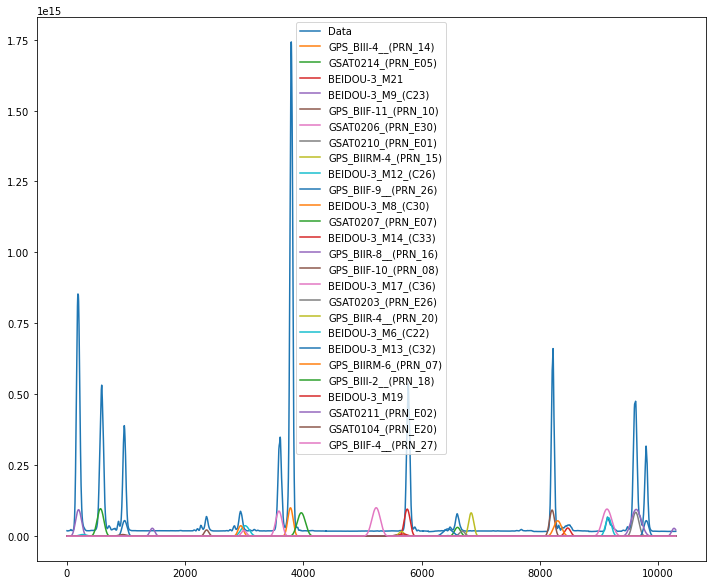

[3794]


In [49]:
cut = [0,len(D[11])]
channel = 11

plt.figure(figsize=(12,10))
plt.plot(D[channel][cut[0]:cut[1]].real,label='Data')

tracks = {}
sats = {}
for n,s in zip(D.sat_id,D.sat):
    if "COS" not in n:
        #dx= np.exp(-np.cos(s['alt'])**2/(2*0.05**2))
        track = np.array([np.cos(s['alt'])*np.cos(s['az']),np.cos(s['alt'])*np.sin(s['az'])]).T
        dx = SingleFreqGeometry().point_source(channel,1,track).real
        if max(dx[cut[0]:cut[1]])>0.02:
            plt.plot(dx[cut[0]:cut[1]]*1e14,label=n)
            tracks[n] = track
            sats[n] = dx
        
plt.legend()
plt.show()
print(np.arange(cut[0],cut[1])[D[channel][cut[0]:cut[1]].real==max(D[channel][cut[0]:cut[1]].real)])

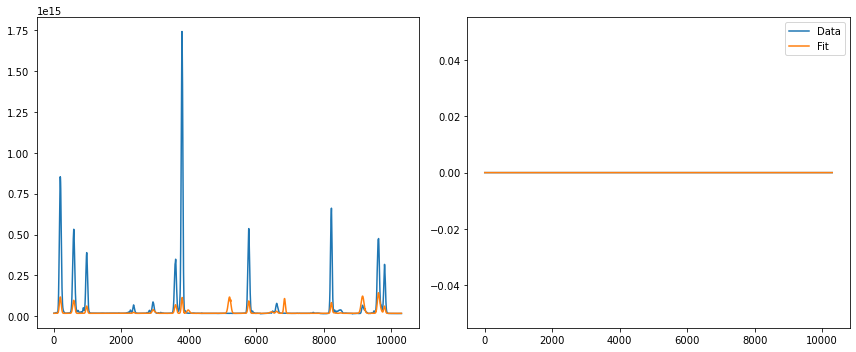

In [99]:
cut = [0,-1]
channels = [11]
#channels = [12,13,14,23,24,34]

theory = TheoryPredictor(D, satAmp=1e7)
theory.setParameters({#'A1_GPS_BIII-4__(PRN_14)':4.15455979e+07,
                      #'A1_GSAT0214_(PRN_E05)':2.49581475e+07,
                      #'A1_BEIDOU-3_M21':2.56420703e+07,
                      #'A1_BEIDOU-3_M9_(C23)':2.88965661e+07,
                      #'A1_GPS_BIIF-11_(PRN_10)':3.05038713e+07,
                      #'A1_GSAT0206_(PRN_E30)':2.46993638e+07,
                      #'A1_GSAT0210_(PRN_E01)':2.18210034e+07,
                      #'A1_GPS_BIIRM-4_(PRN_15)':1.32348938e+01,
                      #'A1_BEIDOU-3_M12_(C26)':9.35447215e+06,
                      #'A1_GPS_BIIF-9__(PRN_26)':2.68904502e+07,
                      #'A1_BEIDOU-3_M8_(C30)': 1.79175026e+07,
                      #'A1_GSAT0207_(PRN_E07)':2.05479866e+07,
                      #'A1_BEIDOU-3_M14_(C33)':2.69742005e+07,
                      #'A1_GPS_BIIR-8__(PRN_16)':3.82467917e+07,
                      #'A1_GPS_BIIF-10_(PRN_08)':2.68578399e+07,
                      #'A1_BEIDOU-3_M17_(C36)':5.42613508e+06,
                      #'A1_GSAT0203_(PRN_E26)':3.79458521e+07,
                      #'A1_GPS_BIIR-4__(PRN_20)':4.31497376e+07,
                      #'A1_BEIDOU-3_M6_(C22)':9.72117415e+07,
                      #'A1_BEIDOU-3_M13_(C32)':3.15987810e+06,
                      #'A1_GPS_BIIRM-6_(PRN_07)':3.26199727e+05,
                      #'A1_GPS_BIII-2__(PRN_18)':8.73389690e+00,
                      #'A1_BEIDOU-3_M19':1.51259908e+07,
                      #'A1_GSAT0211_(PRN_E02)':8.87700334e+06,
                      #'A1_GSAT0104_(PRN_E20)':1.42889237e+08,
                      #'A1_GPS_BIIF-4__(PRN_27)':1.54174630e+05,
                      'D1_beam_center_x':1.65122615e-02,
                      'D1_beam_center_y':-1.90871184e-02,
                      'D1_beam_sigma_x':6.88009622e-02,
                      'D1_beam_sigma_y':6.79574771e-02,
                      'D1_beam_smooth_x':5.42165243e-02,
                      'D1_beam_smooth_y':5.05196347e-02,
                      'CH11_offset':sum(D[11]-abs(D[12])*abs(D[13])/abs(D[23]))/len(D[11]),
                      #'A2_BEIDOU-3_M9_(C23)':2.80114112e+07,
                      #'A2_GSAT0214_(PRN_E05)':2.38645275e+07,
                      #'A2_GPS_BIIF-9__(PRN_26)':3.10590316e+07,
                      'D2_beam_center_x':1.65383259e-02,
                      'D2_beam_center_y':-2.10388157e-02,
                      'D2_beam_sigma_x':6.11850725e-02,
                      'D2_beam_sigma_y':6.28465255e-02,
                      'D2_beam_smooth_x':5.07914419e-02,
                      'D2_beam_smooth_y':4.49615096e-02,
                      'CH22_offset':sum(D[22]-abs(D[12])*abs(D[23])/abs(D[13]))/len(D[11]),
                      #'A3_BEIDOU-3_M9_(C23)':3.06971004e+07,
                      #'A3_GSAT0214_(PRN_E05)':2.65858358e+07,
                      #'A3_GPS_BIIF-9__(PRN_26)':3.33572275e+07,
                      'D3_beam_center_x':-8.57652626e-04,
                      'D3_beam_center_y':-1.22411279e-02,
                      'D3_beam_sigma_x':4.83194922e-02,
                      'D3_beam_sigma_y':9.11159079e-02,
                      'D3_beam_smooth_x':5.58520638e-02,
                      'D3_beam_smooth_y':5.58290830e-02,
                      'CH33_offset':sum(D[33]-abs(D[13])*abs(D[23])/abs(D[12]))/len(D[11]),
                      #'A4_BEIDOU-3_M9_(C23)':2.87770413e+07,
                      #'A4_GSAT0214_(PRN_E05)':2.78199049e+07,
                      #'A4_GPS_BIIF-9__(PRN_26)':3.85992804e+07,
                      'D4_beam_center_x':-1.93843296e-02,
                      'D4_beam_center_y':3.56587146e-02,
                      'D4_beam_sigma_x':9.30582348e-02,
                      'D4_beam_sigma_y':5.55926832e-02,
                      'D4_beam_smooth_x':3.37224349e-02,
                      'D4_beam_smooth_y':5.27998514e-02,
                      'CH44_offset':sum(D[44]-abs(D[24])*abs(D[34])/abs(D[23]))/len(D[11]),
                      #'D_all_dist':4.4248027,
                      'D1_pos_x':0,
                      'D1_pos_y':4.4248027,
                      'D1_phi':0,
                      'D2_pos_x':4.4248027,
                      'D2_pos_y':-0.03475731,
                      'D2_phi':-0.23402276,
                      'D3_pos_x':0.24973297,
                      'D3_pos_y':-4.30383942,
                      'D3_phi':2.36467821,
                      'D4_pos_x':-4.16894658,
                      'D4_pos_y':0.20006629,
                      'D4_phi':-0.34090914,
                     })
#print(theory.allParameters())

theory.showFit(cut=cut, channels=channels)

[ 4.16218208e+07  2.51124801e+07  2.57333364e+07  2.90124525e+07
  3.06431924e+07  2.49353008e+07  2.18417862e+07  1.06763587e+06
  1.13615567e+07  2.70995389e+07  1.84597749e+07  2.16702500e+07
  3.08958829e+07  8.31285380e+06  2.87018837e+07  4.52587408e+06
  3.72369387e+07 -1.63343131e+07  9.39656323e+07 -9.10663732e+05
  4.89380678e+07  9.43603437e+06  1.66256340e+07  1.00001914e+07
  9.08837660e+08  1.11996747e+07  1.00059542e+07  1.00000230e+07
  8.72803570e+06  1.00001628e+07  1.00000000e+07  1.00000000e+07
  1.00000000e+07  1.00000000e+07  1.25401981e+07  1.00000000e+07
  3.35780258e+06  1.00000000e+07  2.89945860e+08  1.00000000e+07
  1.00000000e+07  1.00000000e+07  1.00000000e+07  9.55019121e+06
  1.00000000e+07  1.52082572e+08  1.00000000e+07  1.00000000e+07
  6.61689732e+05]


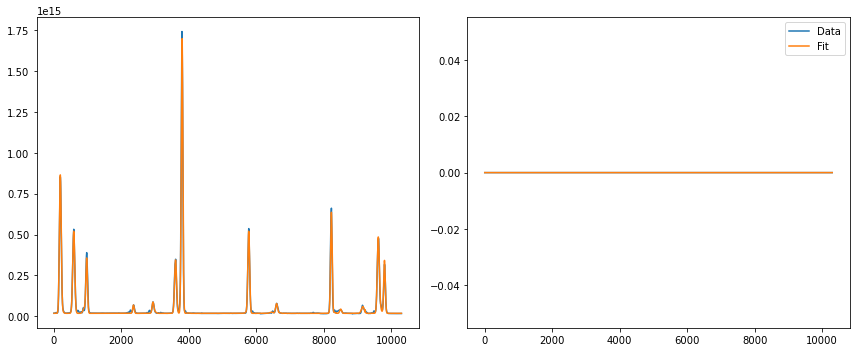

[ 4.12245646e+07  2.41004998e+07  2.47592671e+07  2.81947384e+07
  3.06845476e+07  2.54033197e+07  2.31676283e+07  1.10317763e+06
  6.56653865e+06  3.12101145e+07  2.56225293e+07  2.77613877e+07
  2.52358744e+07  1.52433588e+07  4.12127688e+07  4.89602786e+06
  5.72796076e+07  1.00807903e+08  5.26536632e+07 -5.43710162e+07
  1.48556728e+09  1.02836001e+07  2.46149404e+09  9.99999224e+06
  3.33348595e+08  3.73643385e+07  1.00002447e+07  9.99999999e+06
  6.12818953e+06  1.00000139e+07  1.00000000e+07  1.00000000e+07
  1.00000000e+07  1.00000000e+07  3.79391972e+07  9.99999999e+06
  1.89321517e+06  1.00000000e+07 -6.97380446e+08  1.00000000e+07
  1.00000000e+07  1.00000000e+07  1.00000000e+07  5.06348984e+06
  1.00000000e+07  2.89506329e+08  1.00000000e+07  9.99999997e+06
  4.83925618e+05]


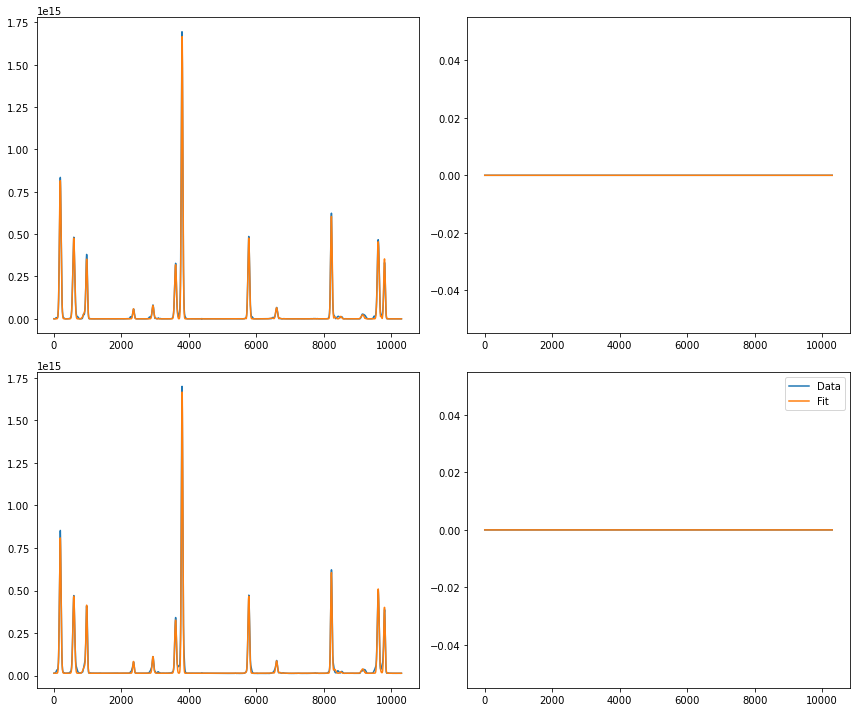

[ 4.68944221e+07  2.71929341e+07  2.73864382e+07  3.13358360e+07
  3.36848553e+07  2.74250617e+07  2.53874532e+07  5.34408927e+05
  1.06566618e+07  3.22079608e+07  2.92631611e+07  3.16692184e+07
  2.34826943e+07  7.70475478e+06  5.44641270e+07  8.25386035e+06
  3.53824356e+07  3.22255377e+06 -7.91643710e+07 -3.60334542e+07
  3.11590932e+08  5.99677078e+06 -3.37665162e+08  1.00333284e+07
 -2.36435546e+08  9.81931149e+06  1.00164371e+07  1.00198640e+07
  1.12714241e+07  1.00003371e+07  9.99982242e+06  1.00000000e+07
  9.99999539e+06  1.00000000e+07  1.79837604e+07  1.00000000e+07
  2.38600502e+06  1.00000112e+07  3.40843039e+07  1.00000000e+07
  1.00000000e+07  1.00000000e+07  1.00000000e+07  1.59022705e+06
  1.00000000e+07  8.19468118e+08  1.00000000e+07  1.00000000e+07
  8.82131442e+04]


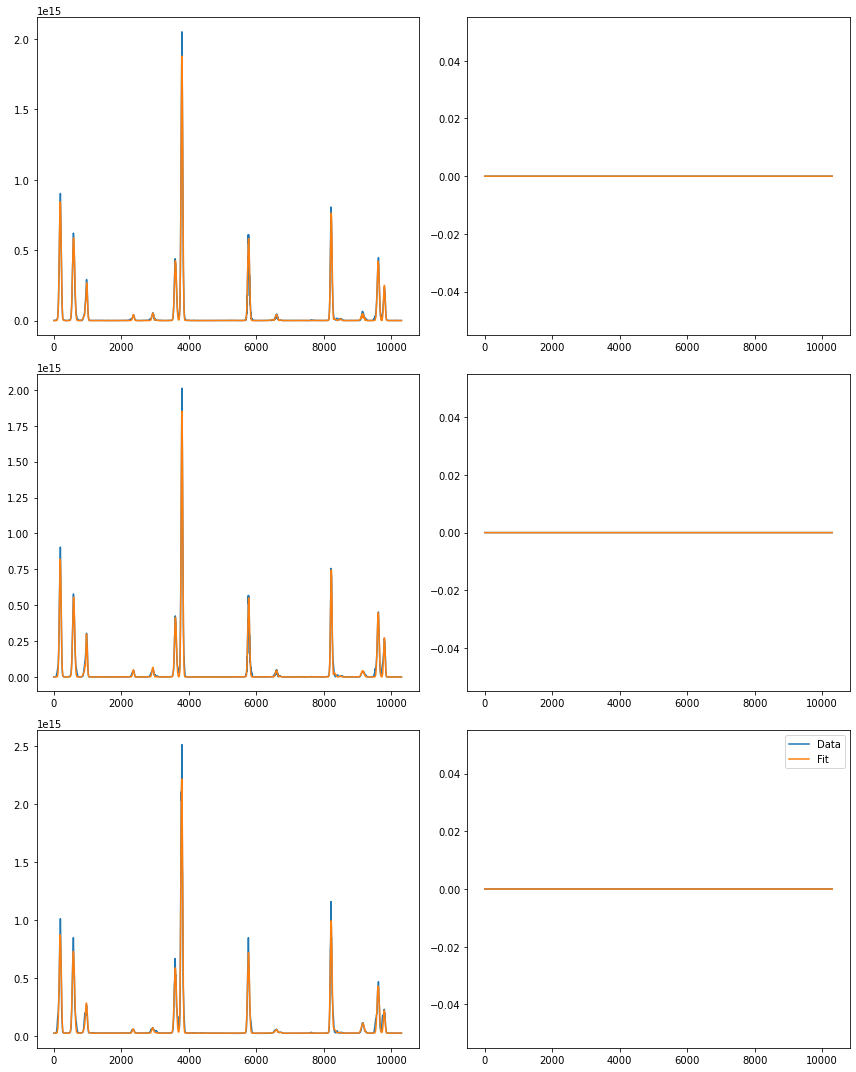

[ 4.19255336e+07  2.80335321e+07  3.08290372e+07  3.00471145e+07
  4.39624202e+07  3.78707187e+07  2.73542578e+07  2.55049873e+06
  1.11850836e+07  6.27870162e+07  1.61105851e+09  5.87691518e+08
  3.92551956e+07  2.90423517e+06  2.25481833e+09  6.15343071e+07
  7.92949041e+08  4.16164884e+07  1.36066025e+08  2.42131235e+09
  1.60565493e+09  7.61872331e+07 -8.42032618e+09  9.44160158e+09
  2.48535501e+08  9.99999508e+06  1.11281806e+07  7.44645507e+09
  1.20876501e+09  1.00081981e+07  2.25904527e+05  9.93240059e+06
  1.00000382e+07  9.98080856e+06  4.23222891e+06  9.99999975e+06
  1.08923122e+06  9.98623200e+06 -2.90556032e+08  1.00000005e+07
  9.99999643e+06  1.00000027e+07  1.00000032e+07 -2.26850465e+06
  1.00000037e+07  7.87826470e+10  9.99999589e+06  9.99999553e+06
  9.14819664e+04]


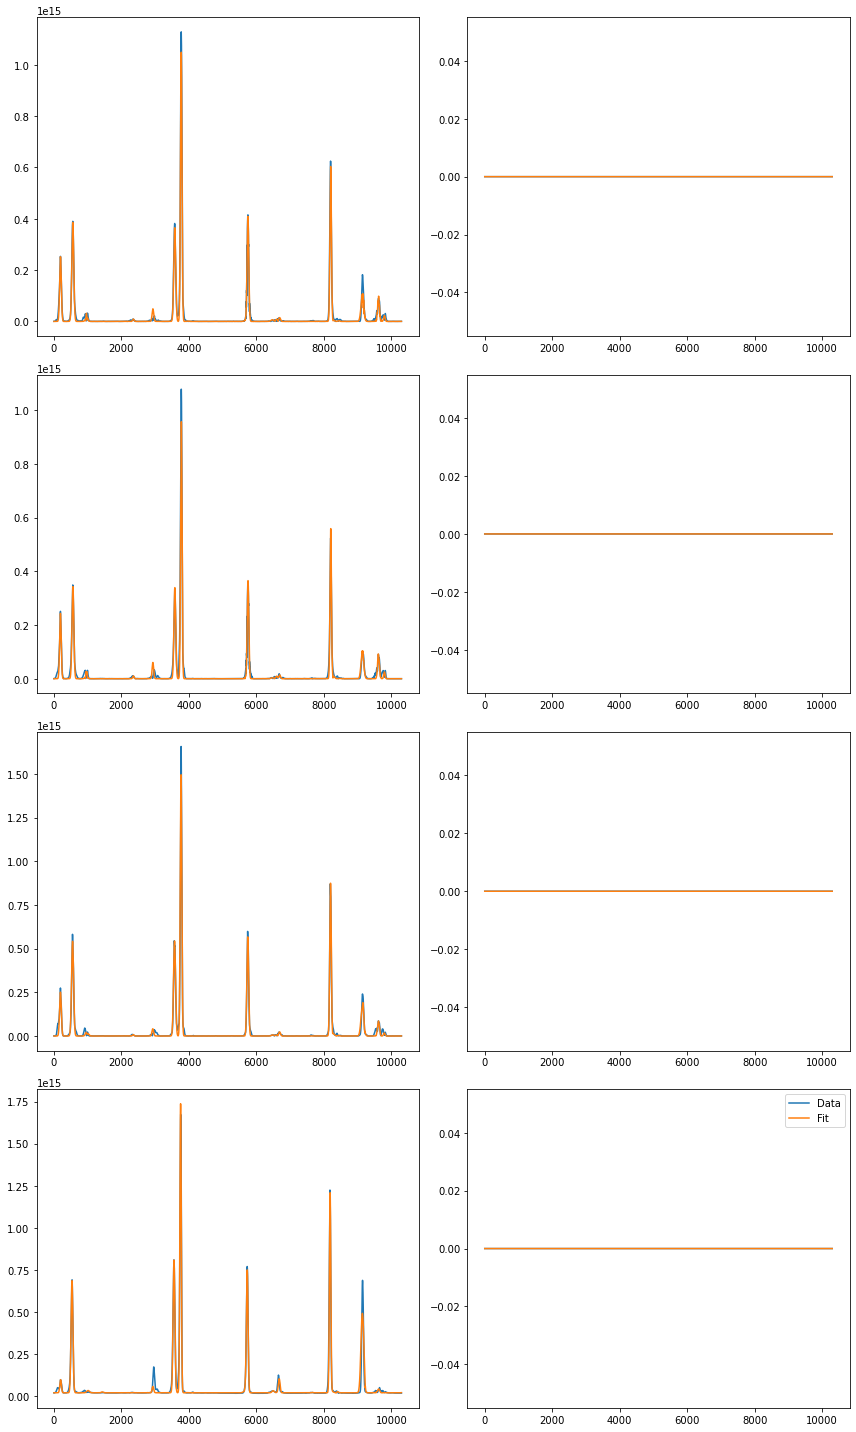

In [100]:
channelSet = [[11],[12,22],[13,23,33],[14,24,34,44],
              [55],[56,66],[57,67,77],[58,68,78,88]]

for i in range(4):
    ch = channelSet[i]
    names = []
    for n in sats.keys():
        names.append('A{}_{}'.format(i+1,n))

    theory.fit(names, mode = 'amp', channels = ch)

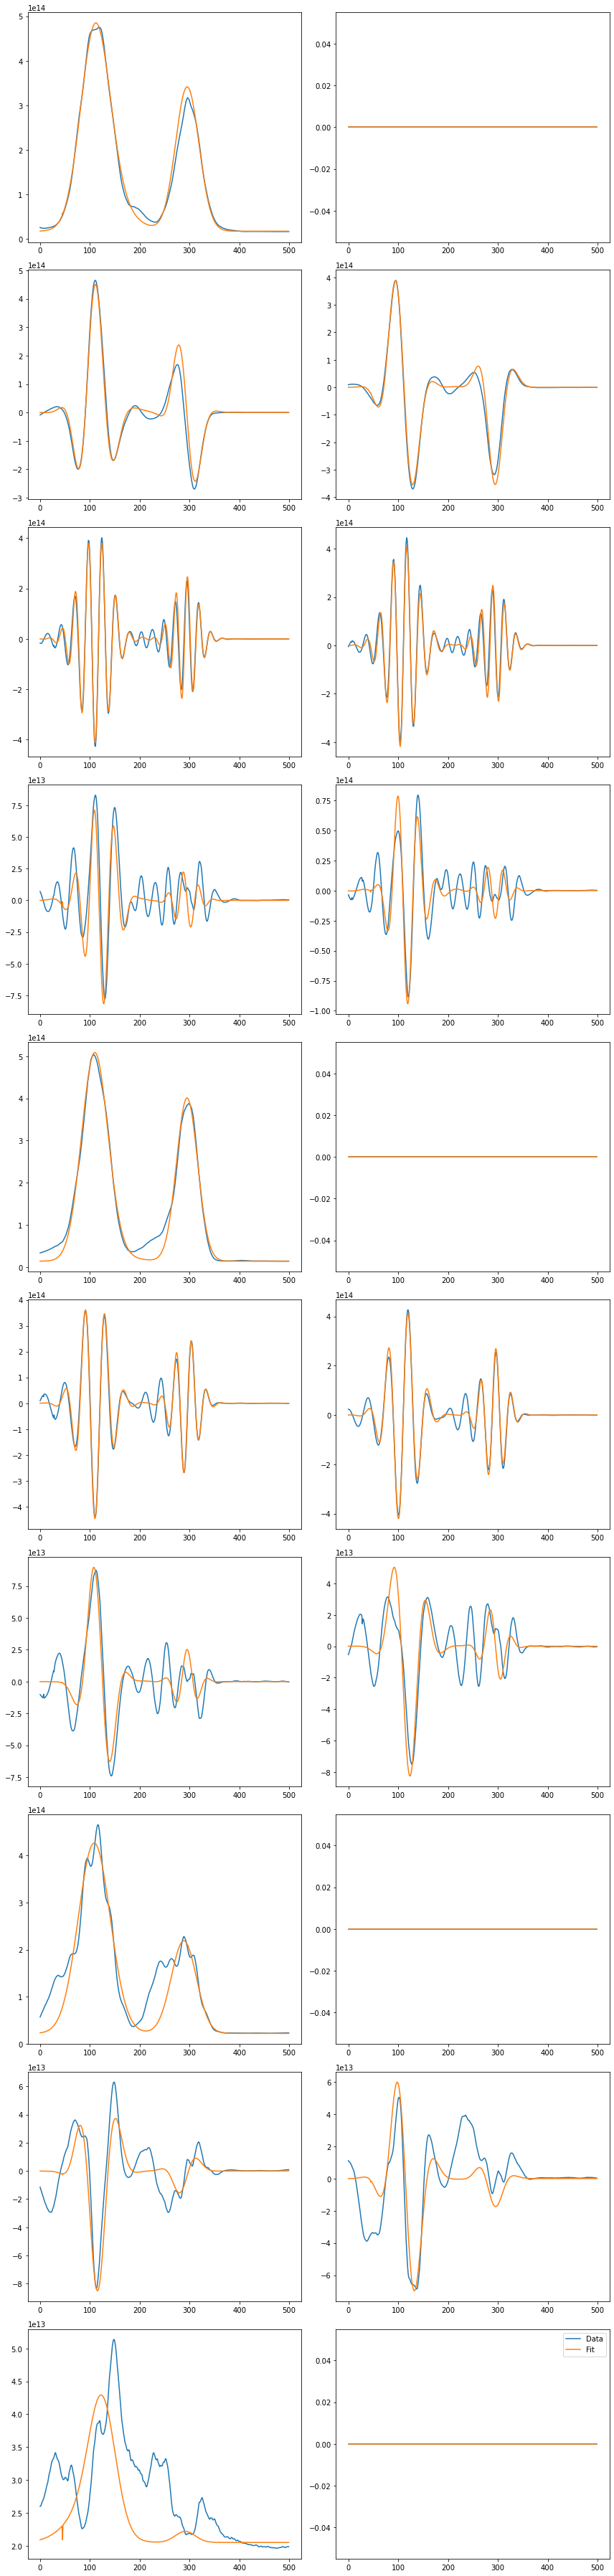

In [104]:
theory.showFit(cut=[9500,10000], channels = [11,12,13,14,22,23,24,33,34,44], mode = 'norm')

[ 4.41970058 -0.04842528 -0.22717103]


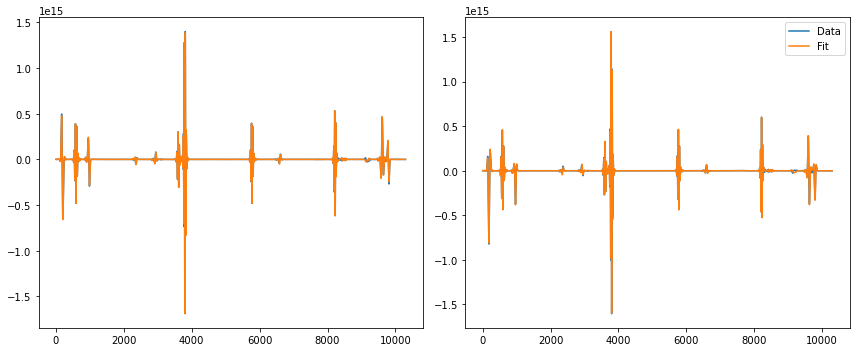

[ 0.24955015 -4.30898962  2.36725904]


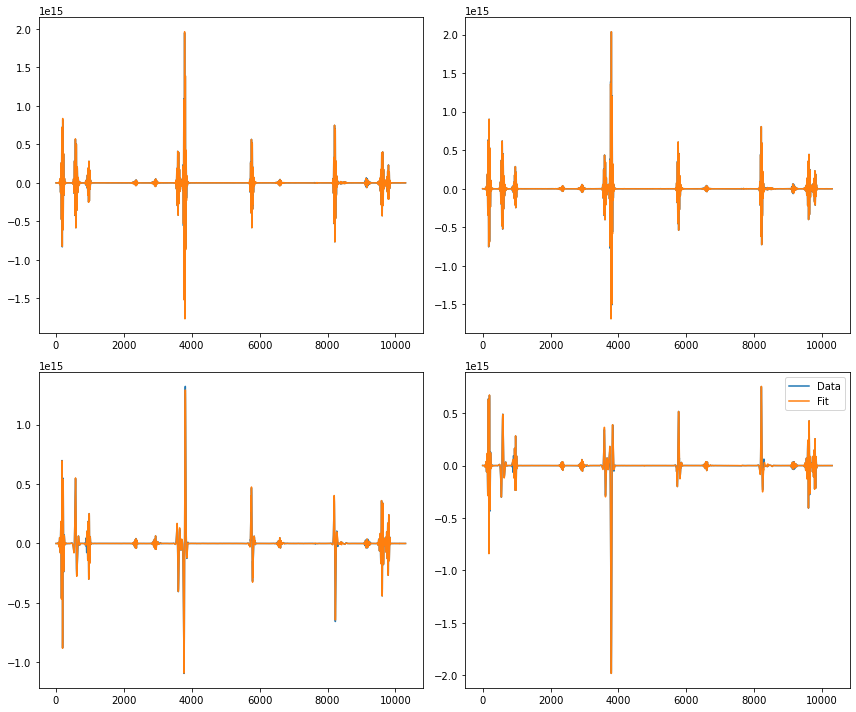

[-4.17021126  0.18822681 -0.34068962]


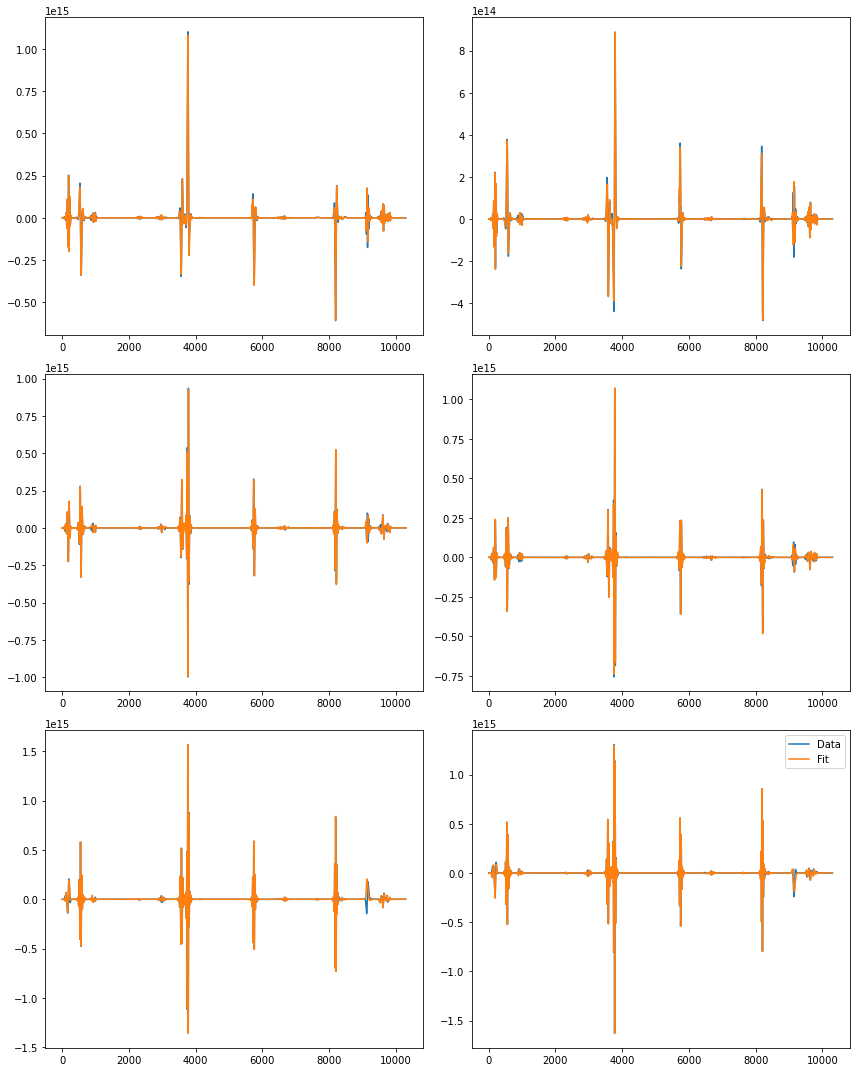

In [106]:
channelSet = [[12],[13,23],[14,24,34],
              [56],[57,67],[58,68,78]]

for i in range(3):
    ch = channelSet[i]
    names = ['D{}_pos_x'.format(i+2),
             'D{}_pos_y'.format(i+2),
             'D{}_phi'.format(i+2)
            ]

    theory.fit(names, mode = 'phase', channels = ch)

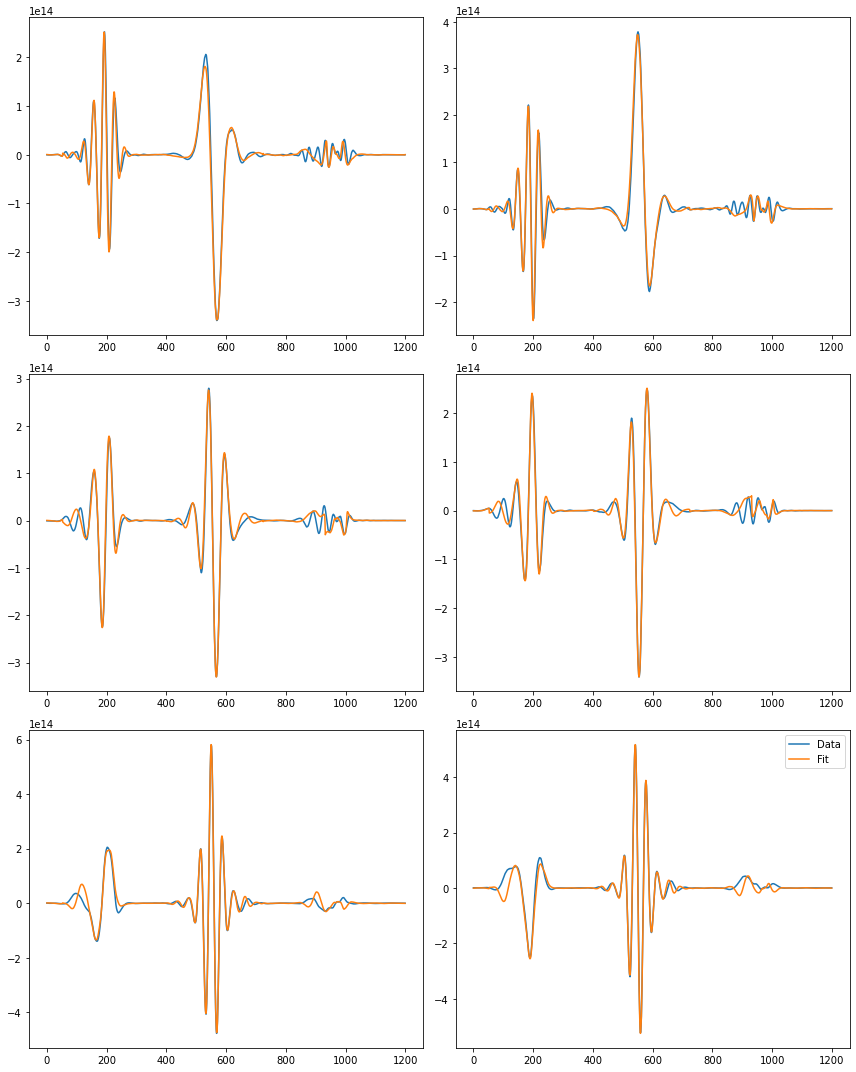

In [107]:
theory.showFit(cut=[0,1200], mode = 'phase')

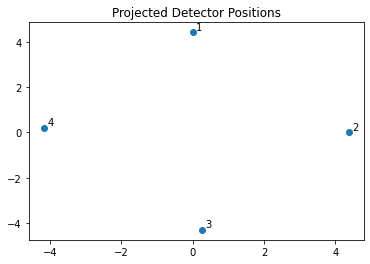

In [12]:
p = theory.readParameters()
xs = []
ys = []
for i in range(4):
    xs.append(p['D{}_pos_x'.format(i+1)])
    ys.append(p['D{}_pos_y'.format(i+1)])
plt.title('Projected Detector Positions')
plt.scatter(xs,ys)
for i in range(4):
    plt.text(xs[i]+0.1,ys[i]+0.1,str(i+1))
plt.show()

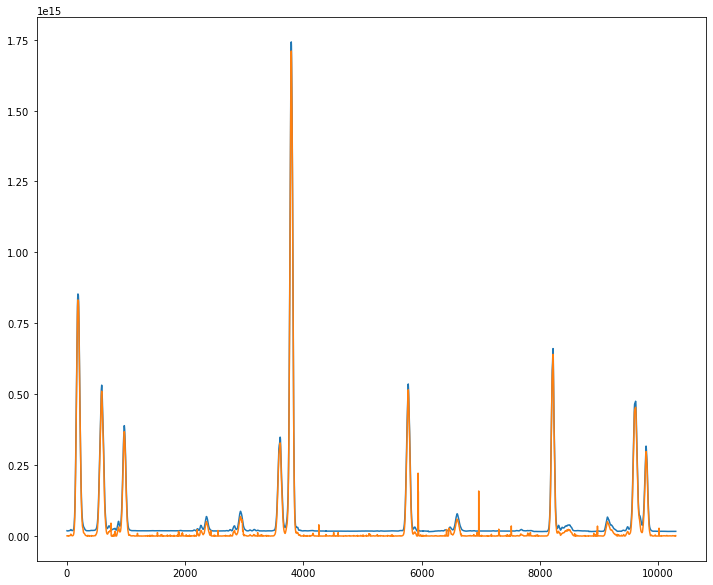

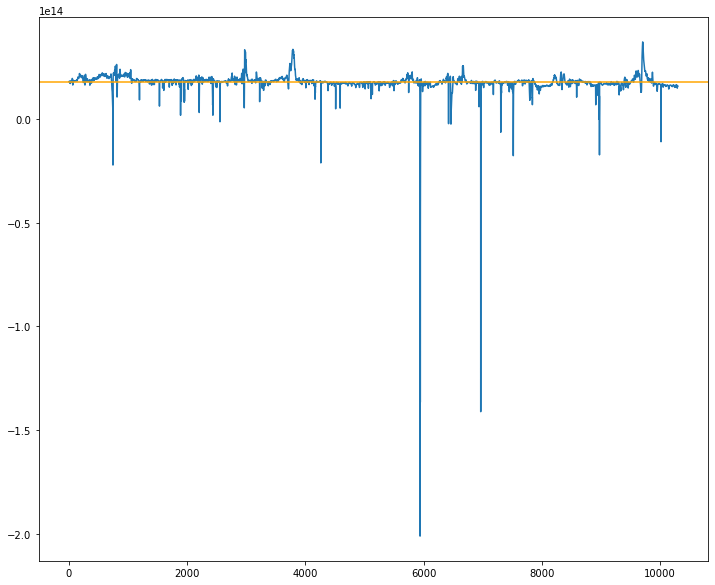

17800528617401.207


In [84]:
plt.figure(figsize=(12,10))
plt.plot(D[11])
plt.plot(abs(D[12])*abs(D[13])/abs(D[23]))
plt.show()

diff = D[11]-abs(D[12])*abs(D[13])/abs(D[23])
plt.figure(figsize=(12,10))
plt.plot(diff)
avg = sum(D[11]-abs(D[12])*abs(D[13])/abs(D[23]))/len(D[11])
plt.axhline(avg, color='orange')
plt.show()
print(avg)

In [11]:
Data_ids = ["pas/210904_2300","pas/210905_2300","pas/210906_2300","pas/210907_2300"]

def getPhaseFit(DatNum):
    D = bmxobs.BMXSingleFreqObs(Data_ids[DatNum])
    theory = TheoryPredictor(D, satAmp=1e7)
    
    theory.setParameters({'D1_beam_center_x':1.65122615e-02,
                          'D1_beam_center_y':-1.90871184e-02,
                          'D1_beam_sigma_x':6.88009622e-02,
                          'D1_beam_sigma_y':6.79574771e-02,
                          'D1_beam_smooth_x':5.42165243e-02,
                          'D1_beam_smooth_y':5.05196347e-02,
                          'CH11_offset':sum(D[11]-abs(D[12])*abs(D[13])/abs(D[23]))/len(D[11]),
                          'D2_beam_center_x':1.65383259e-02,
                          'D2_beam_center_y':-2.10388157e-02,
                          'D2_beam_sigma_x':6.11850725e-02,
                          'D2_beam_sigma_y':6.28465255e-02,
                          'D2_beam_smooth_x':5.07914419e-02,
                          'D2_beam_smooth_y':4.49615096e-02,
                          'CH22_offset':sum(D[22]-abs(D[12])*abs(D[23])/abs(D[13]))/len(D[11]),
                          'D3_beam_center_x':-8.57652626e-04,
                          'D3_beam_center_y':-1.22411279e-02,
                          'D3_beam_sigma_x':4.83194922e-02,
                          'D3_beam_sigma_y':9.11159079e-02,
                          'D3_beam_smooth_x':5.58520638e-02,
                          'D3_beam_smooth_y':5.58290830e-02,
                          'CH33_offset':sum(D[33]-abs(D[13])*abs(D[23])/abs(D[12]))/len(D[11]),
                          'D4_beam_center_x':-1.93843296e-02,
                          'D4_beam_center_y':3.56587146e-02,
                          'D4_beam_sigma_x':9.30582348e-02,
                          'D4_beam_sigma_y':5.55926832e-02,
                          'D4_beam_smooth_x':3.37224349e-02,
                          'D4_beam_smooth_y':5.27998514e-02,
                          'CH44_offset':sum(D[44]-abs(D[24])*abs(D[34])/abs(D[23]))/len(D[11]),
                          'D1_pos_x':0,
                          'D1_pos_y':4.4248027,
                          'D1_phi':0,
                          'D2_pos_x':4.4248027,
                          'D2_pos_y':-0.03475731,
                          'D2_phi':-0.23402276,
                          'D3_pos_x':0.24973297,
                          'D3_pos_y':-4.30383942,
                          'D3_phi':2.36467821,
                          'D4_pos_x':-4.16894658,
                          'D4_pos_y':0.20006629,
                          'D4_phi':-0.34090914,
                         })
    
    params = []
    channelSet = [[12],[13,23],[14,24,34],
                  [56],[57,67],[58,68,78]]

    
    for i in range(3):
        ch = channelSet[i]
        names = ['D{}_pos_x'.format(i+2),
                 'D{}_pos_y'.format(i+2),
                 'D{}_phi'.format(i+2)
                ]

        params.append(theory.fit(names, mode = 'phase', channels = ch))
    
    return np.array(params)

[ 4.42392068 -0.03571321 -0.23365269]


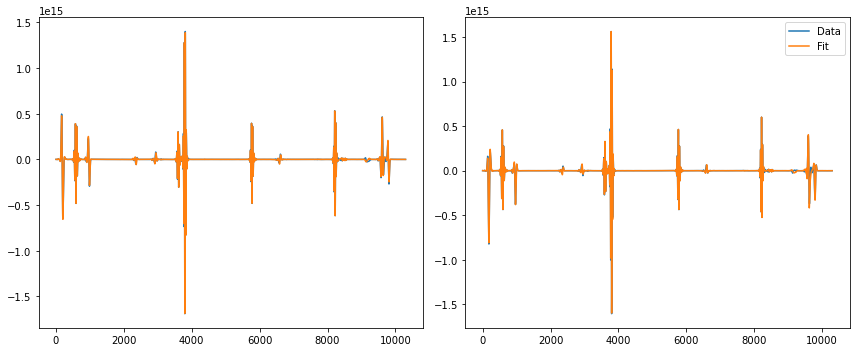

[ 0.2490332  -4.30498103  2.36508481]


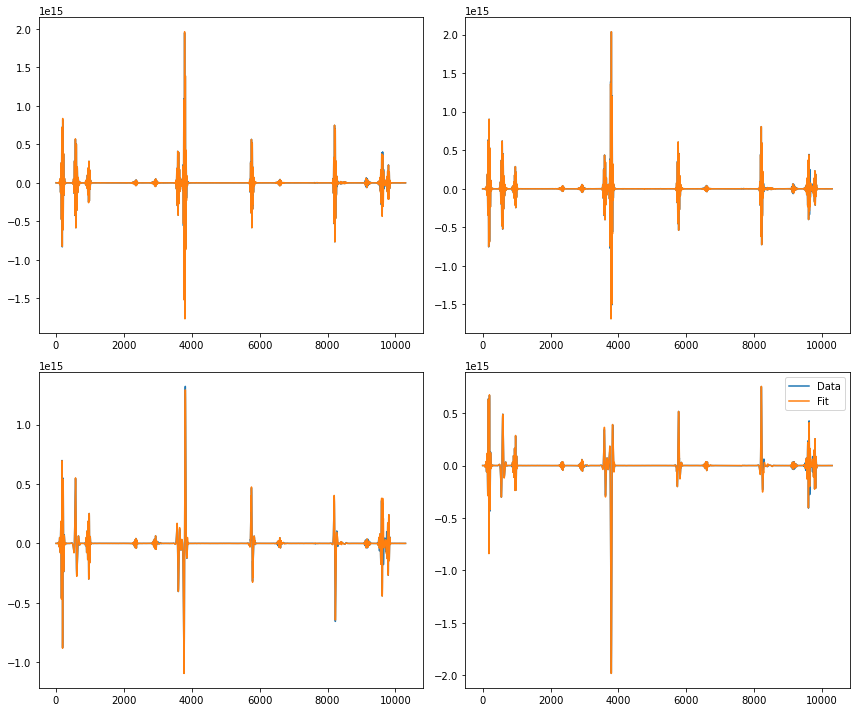

[-4.17015064  0.19936259 -0.34028735]


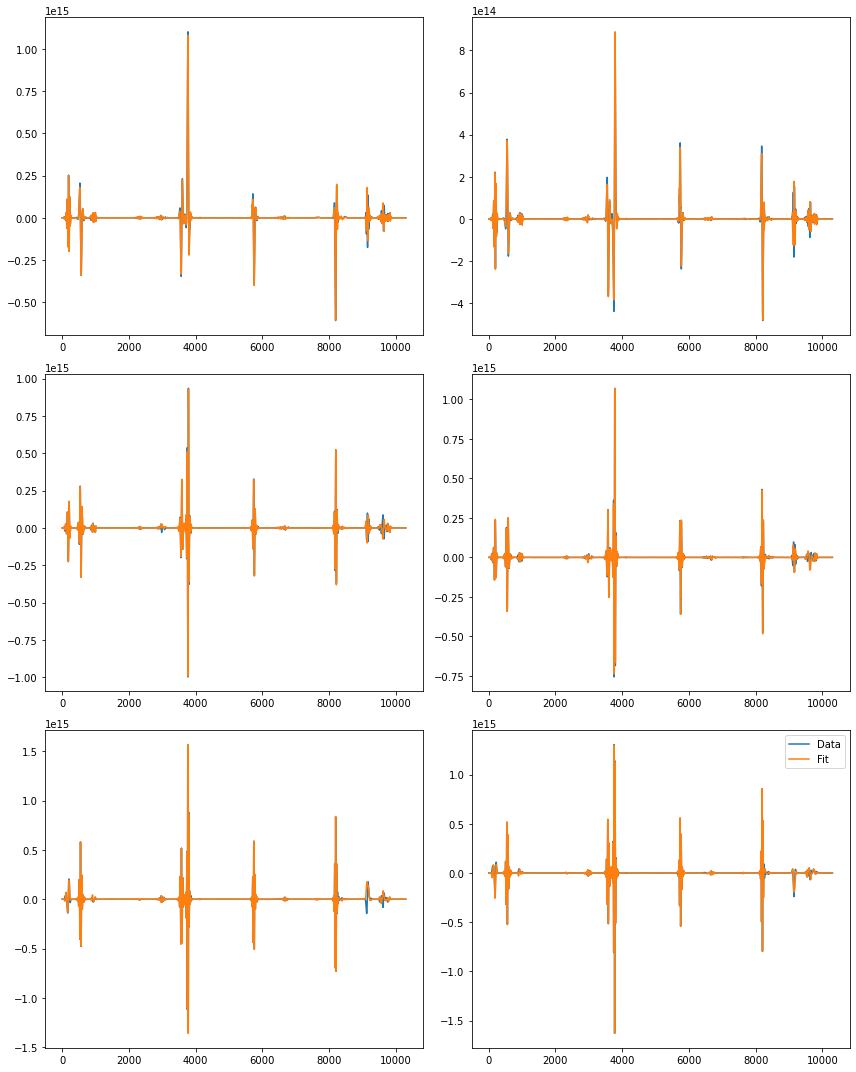

In [12]:
allParams = []
allParams.append(getPhaseFit(0))

[ 4.38576946 -0.05998426 -0.25900936]


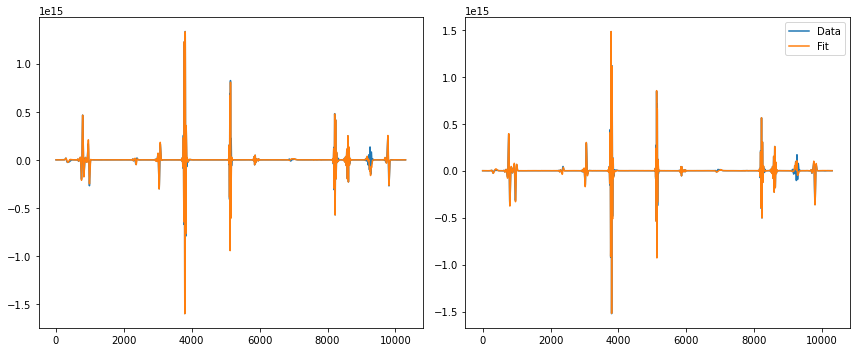

[ 0.25283273 -4.31265077  2.34119252]


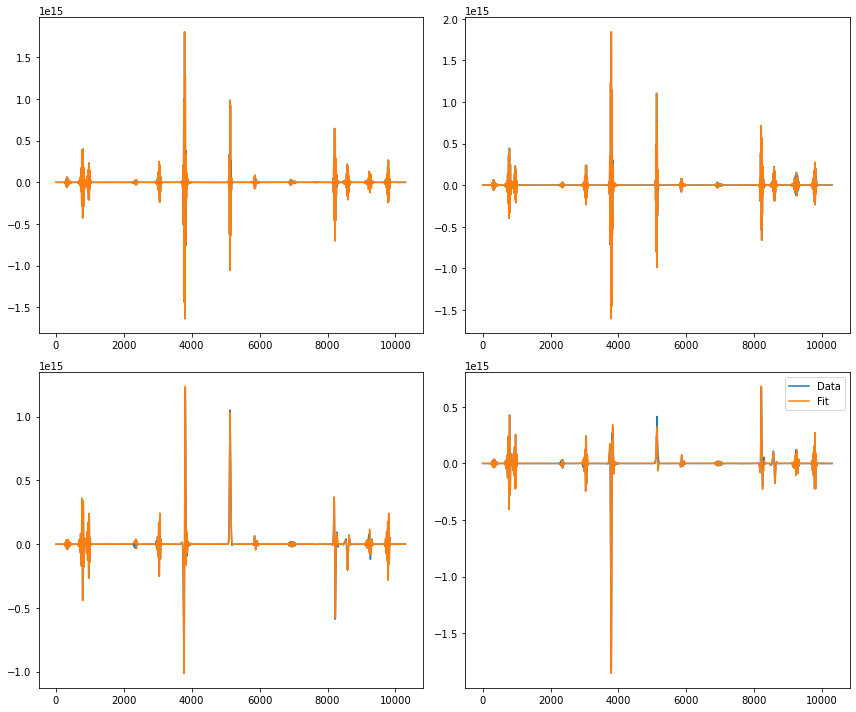

[-4.06282702  0.25104054 -0.40501458]


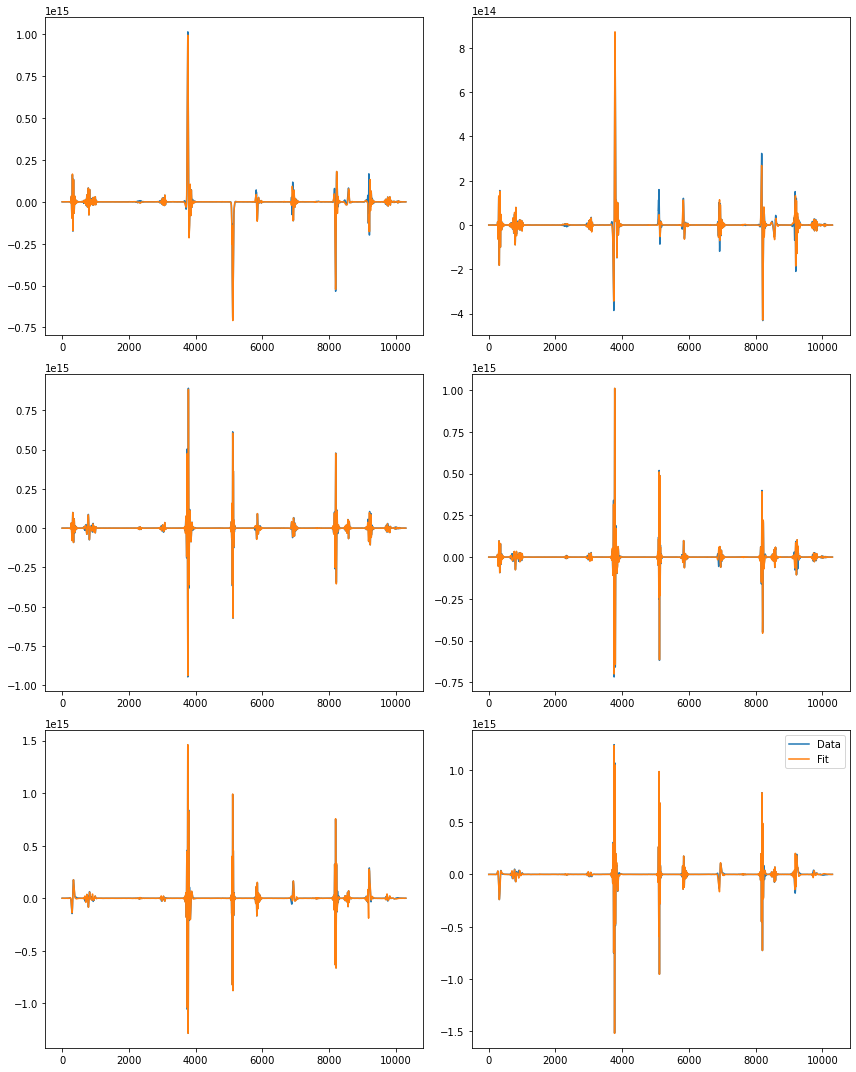

In [13]:
allParams.append(getPhaseFit(1))

[ 4.40795258 -0.04597214 -0.26761304]


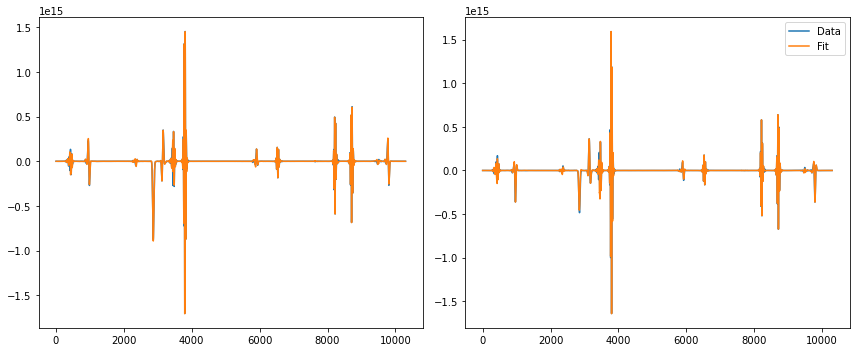

[-0.13359335 -4.60625306  2.16835315]


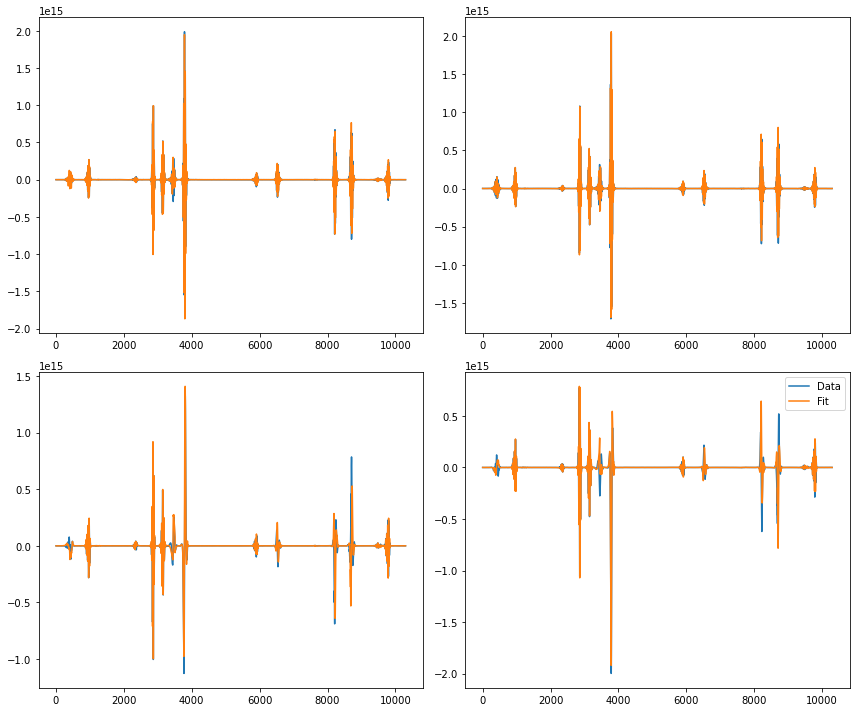

[-4.83138612 -0.18829866 -0.51813847]


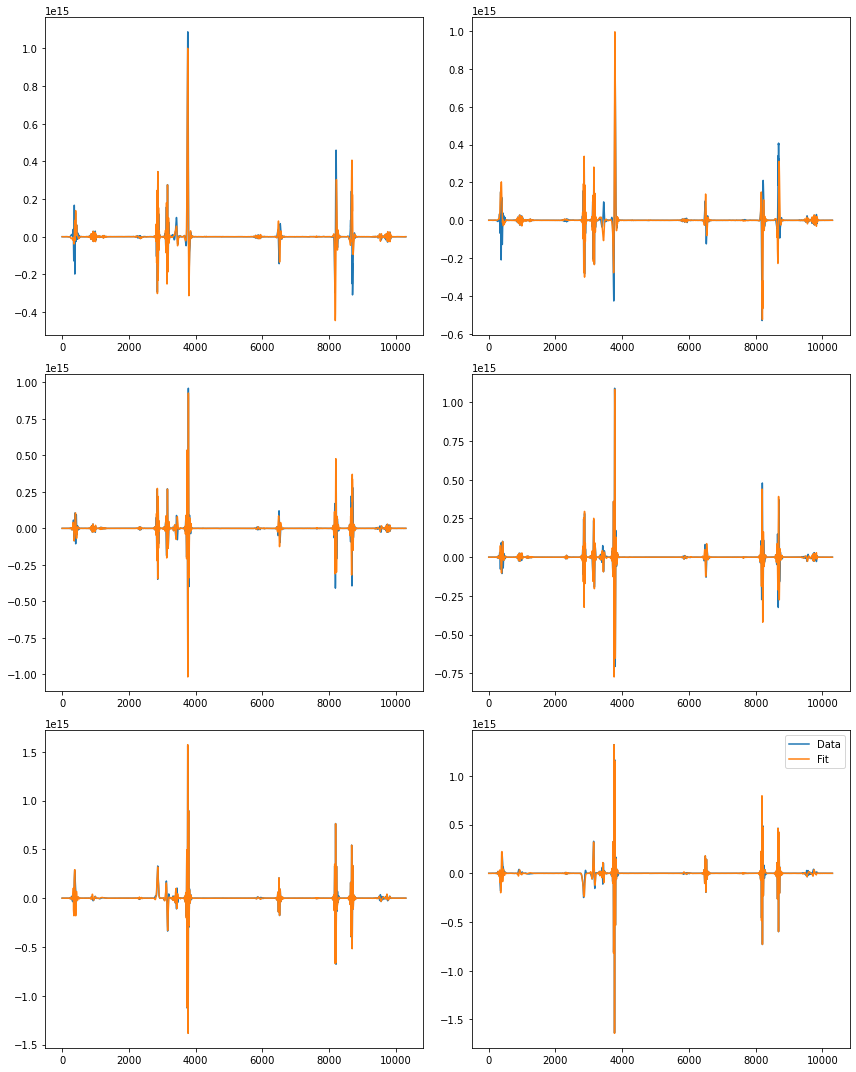

In [14]:
allParams.append(getPhaseFit(2))

In [15]:
#allParams.append(getPhaseFit(3))

In [16]:
allParams = np.array(allParams)
avgParams = allParams.sum(axis=0)/len(allParams)
sdvParams = np.sqrt(((allParams-avgParams)**2).sum(axis=0)/len(allParams))
print(avgParams)
print(sdvParams)

[[ 4.40588091 -0.0472232  -0.25342503]
 [ 0.12275753 -4.40796162  2.29154349]
 [-4.35478793  0.08736816 -0.4211468 ]]
[[0.01564391 0.00994803 0.01441561]
 [0.18127408 0.14024818 0.08765313]
 [0.33984209 0.19606427 0.07349804]]
